## 1) Install Quandl library

In [1]:
# Import Libraies 
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
#signing into Quandl
quandl.ApiConfig.api_key = 'sVobtxzFzxiui_RhoXF3'

## 2) Quandl Data interest rates

In [3]:
#Federal Reserve Data Net percentage of domestic banks reporting stronger demand for household loans, weighted by banks' outstanding loan balances
data = quandl.get('FED/SUBLPDMHD_XWB_N_Q')

In [4]:
data

Value
Date             
2018-03-31  -10.1
2018-06-30  -25.8
2018-09-30    8.7
2018-12-31   -0.6
2019-03-31  -21.1
2019-06-30  -27.5
2019-09-30   35.7
2019-12-31   29.4
2020-03-31   -8.6
2020-06-30   -6.8
2020-09-30  -44.8
2020-12-31   25.5
2021-03-31   -1.4
2021-06-30    7.2
2021-09-30   46.1
2021-12-31  -10.0
2022-03-31   12.9
2022-06-30   -0.6
2022-09-30  -30.3
2022-12-31  -36.8
2023-03-31  -64.5
2023-06-30  -15.8
2023-09-30    2.6

In [5]:
data.shape

(23, 1)

## 4) Line chart of data

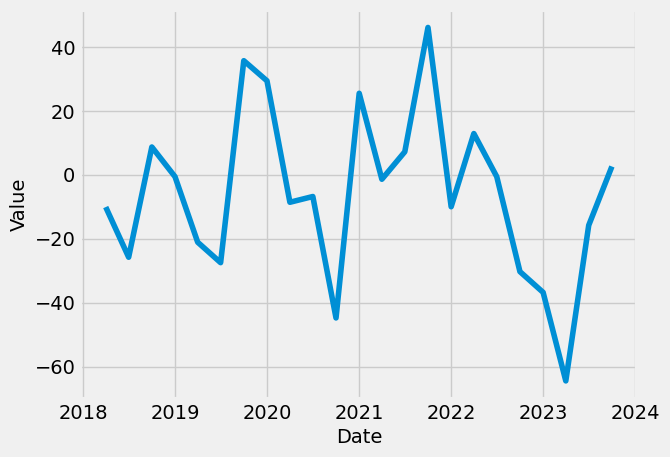

In [6]:
line = sns.lineplot(data = data, x = 'Date',y = 'Value')

## 3)  Create subset

In [7]:
#resets data so the Data column can now be manipulated
data_2 = data.reset_index()

In [8]:
#new subset
data_sub = data_2.loc[(data_2['Date'] >= '2018-03-31') & (data_2['Date'] < '2020-03-31')]

In [9]:
data_sub

Date  Value
0 2018-03-31  -10.1
1 2018-06-30  -25.8
2 2018-09-30    8.7
3 2018-12-31   -0.6
4 2019-03-31  -21.1
5 2019-06-30  -27.5
6 2019-09-30   35.7
7 2019-12-31   29.4

In [10]:
# change index in subset
timecol = 'Date'

In [11]:
df = pd.to_datetime(data_sub[timecol])

In [12]:
data_sub.set_index(timecol, inplace=True)

In [13]:
df_sub = data_sub.sort_index(inplace=True)

In [14]:
data_sub

Value
Date             
2018-03-31  -10.1
2018-06-30  -25.8
2018-09-30    8.7
2018-12-31   -0.6
2019-03-31  -21.1
2019-06-30  -27.5
2019-09-30   35.7
2019-12-31   29.4

### Explain my subset
I made this subset because the interest rates and home prices I gathered from my sources stop with data in 2019. I chose 2018-2019 because it aligns with my data for my project because I have no home data for after 2019.  

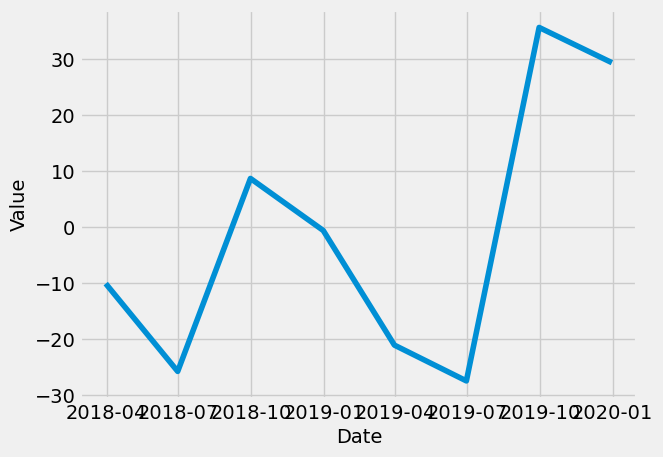

In [15]:
line = sns.lineplot(data = data_sub, x = 'Date',y = 'Value')

## 5) Decompose the data components 

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [17]:
decom = seasonal_decompose(data_sub, model='additive')

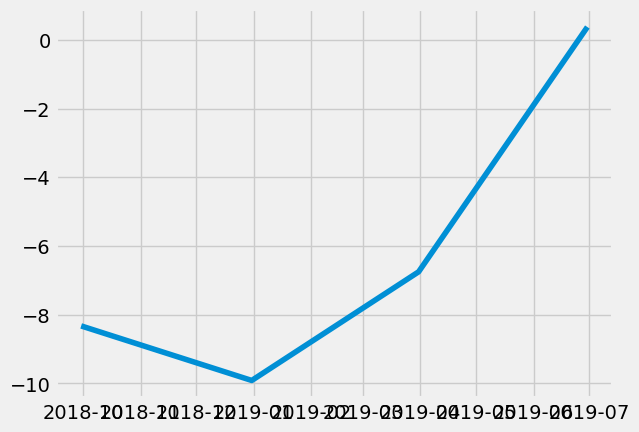

In [18]:
plt.plot(decom.trend)

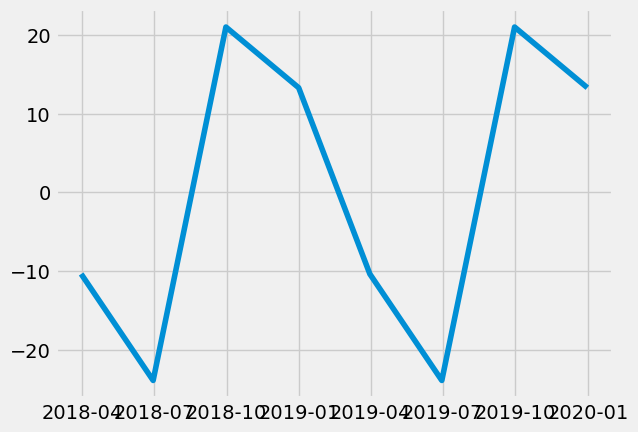

In [19]:
plt.plot(decom.seasonal)

In [20]:
plt.plot(decom.resid)

### Decomposition Explanation
The trend component shows us that data declines slightly in the beginning of 2019, but then trends upward in through 2019. 

The seasonal graph shows how sporadic the graph really is through the data the subset displays. In spring and summer, the data usually falls and increases in fall and winter. The Data_sub information also makes this apparent. 

The residual chart (noise) shows there is no noise in the data.

## 6) Dickey-Fuller test to check for stationarity

In [21]:
#import Fuller Library
from statsmodels.tsa.stattools import adfuller

In [22]:
# Define the ADF function
adf = adfuller (data_sub.Value, maxlag = 1)

In [23]:
adf

(-3.0308558526605225,
 0.03211161028527487,
 1,
 6,
 {'1%': -5.354256481481482,
  '5%': -3.6462381481481483,
  '10%': -2.901197777777778},
 54.6123420704344)

In [24]:
adf = adfuller(data['Value'])
print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])

ADF Statistic: -2.896021
p-value: 0.045813


The P value is 0.045 which is closer to 5% for the critical value so I'll be using that number. Sadly the test statistics value of -2.89 is larger than the 5% value of -3.64, so this stationary data can't reject the null hypothesis. The 10% critical value is larger than the test statistic, but I'm not sure if that value can be compared. 

## Differencing

In [25]:
#differencing the data
data_diff = data_sub - data.shift(1)

In [26]:
data_diff

Value
Date             
2018-03-31    NaN
2018-06-30  -15.7
2018-09-30   34.5
2018-12-31   -9.3
2019-03-31  -20.5
2019-06-30   -6.4
2019-09-30   63.2
2019-12-31   -6.3
2020-03-31    NaN
2020-06-30    NaN
2020-09-30    NaN
2020-12-31    NaN
2021-03-31    NaN
2021-06-30    NaN
2021-09-30    NaN
2021-12-31    NaN
2022-03-31    NaN
2022-06-30    NaN
2022-09-30    NaN
2022-12-31    NaN
2023-03-31    NaN
2023-06-30    NaN
2023-09-30    NaN

In [27]:
#creating a new subset
data_diff = data_2.loc[(data_2['Date'] >= '2018-03-31') & (data_2['Date'] < '2020-03-31')]

In [28]:
data_diff

Date  Value
0 2018-03-31  -10.1
1 2018-06-30  -25.8
2 2018-09-30    8.7
3 2018-12-31   -0.6
4 2019-03-31  -21.1
5 2019-06-30  -27.5
6 2019-09-30   35.7
7 2019-12-31   29.4

In [29]:
#chaning the indexing
df = pd.to_datetime(data_diff[timecol])

data_diff.set_index(timecol, inplace=True)

df_sub = data_diff.sort_index(inplace=True)

In [30]:
#checking my work
data_diff

Value
Date             
2018-03-31  -10.1
2018-06-30  -25.8
2018-09-30    8.7
2018-12-31   -0.6
2019-03-31  -21.1
2019-06-30  -27.5
2019-09-30   35.7
2019-12-31   29.4

In [31]:
# Define the ADF function
adf = adfuller (data_diff.Value, maxlag = 1)
adf = adfuller(data['Value'])
print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])

ADF Statistic: -2.896021
p-value: 0.045813


In [32]:
adf

(-2.896020603552814,
 0.045812707920654505,
 5,
 17,
 {'1%': -3.889265672705068,
  '5%': -3.0543579727254224,
  '10%': -2.66698384083045},
 126.59838715129285)

After differencing, I used the 5% critical value.  The 5% critical value is -3.05 compared to the test statistic of -2.896 which means the test value is larger than critical value because of the negative value. Therefore, the null hypothesisis can't be rejected and the data is non-stationary. 

## 9) Data autocorrelations

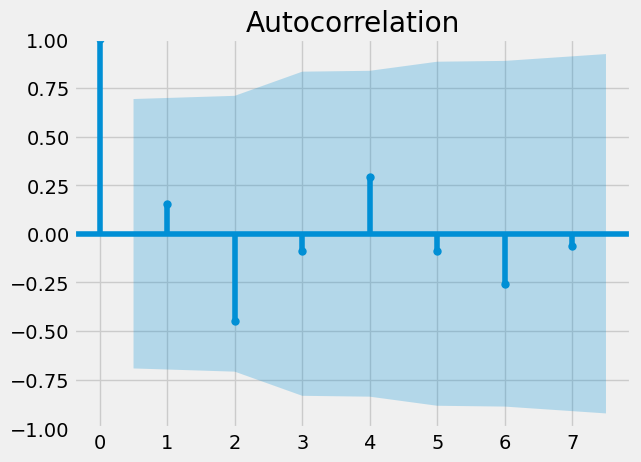

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_diff)
plt.show()

The autocorrelation graph is based on the differencing technique data. 